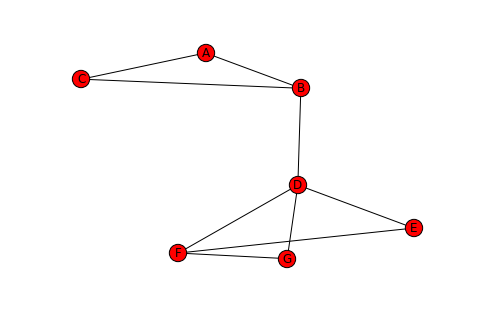

In [1]:
import networkx as nx
%matplotlib inline
def create_example_graph():
    graph = nx.Graph()
    graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'),
                          ('B', 'D'), ('D', 'E'), ('D', 'F'),
                          ('D', 'G'), ('E', 'F'), ('G', 'F')])
    return graph

graph = create_example_graph()
nx.draw(graph, with_labels=True)

In [2]:
nx.edge_betweenness_centrality(graph)

{('A', 'B'): 0.23809523809523808,
 ('A', 'C'): 0.047619047619047616,
 ('B', 'D'): 0.5714285714285714,
 ('C', 'B'): 0.23809523809523808,
 ('D', 'F'): 0.19047619047619047,
 ('D', 'G'): 0.21428571428571427,
 ('E', 'D'): 0.21428571428571427,
 ('E', 'F'): 0.07142857142857142,
 ('G', 'F'): 0.07142857142857142}

In [3]:
def girvan_newman(G, depth=0):
    """ Recursive implementation of the girvan_newman algorithm.
    See http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/book_draft/Social_Networks/Networkx.html
    
    Args:
    G.....a networkx graph

    Returns:
    A list of all discovered communities."""

    if G.order() == 1:
        return [G.nodes()]
    
    def find_best_edge(G0):
        eb = nx.edge_betweenness_centrality(G0)
        # eb is dict of (edge, score) pairs, where higher is better
        # Return the edge with the highest score.
        return sorted(eb.items(), key=lambda x: x[1], reverse=True)[0][0]

    # Each component is a separate community. We cluster each of these.
    components = [c for c in nx.connected_component_subgraphs(G)]
    indent = '   ' * depth  # for printing
    while len(components) == 1:
        edge_to_remove = find_best_edge(G)
        print indent + 'removing', edge_to_remove
        G.remove_edge(*edge_to_remove)
        components = [c for c in nx.connected_component_subgraphs(G)]

    result = [c.nodes() for c in components]
    print  indent + 'components=', result
    for c in components:
        result.extend(girvan_newman(c, depth + 1))

    return result


In [4]:
result = girvan_newman(create_example_graph())

removing ('B', 'D')
components= [['A', 'C', 'B'], ['E', 'D', 'G', 'F']]
   removing ('C', 'B')
   removing ('A', 'B')
   components= [['A', 'C'], ['B']]
      removing ('A', 'C')
      components= [['A'], ['C']]
   removing ('E', 'F')
   removing ('E', 'D')
   components= [['E'], ['D', 'G', 'F']]
      removing ('G', 'F')
      removing ('D', 'G')
      components= [['D', 'F'], ['G']]
         removing ('D', 'F')
         components= [['D'], ['F']]
